PROBLEM DEFINITION

To help Kira Plastinina to understand their customer behaviour using the data they have collected.

METRICS OF SUCCESS

Create a model that distinctively categorizes the customer when visualised

THE CONTEXT

we shall use the historical data collected by Kira Plastinina to establish the customer behaviour and try to segment the customers
Company - Kira Plastinina has since defunct

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

EXPERIMENTAL DESIGN

1.Problem Definition
2.Data Sourcing
3.Check the Data
4.Perform Data Cleaning
5.Perform Exploratory Data Analysis  (Univariate, 6.Bivariate & Multivariate)
7.Implement the Solution
8.Challenge the Solution
9.Follow up Questions

APPROPRIATENESS OF THE DATA

1.The data is appropriate in terms of volume and relevance

In [1]:
#install.packages('DataExplorer')

In [2]:
#Importing libraries
library(readr)
library(dplyr)
library(ggplot2)
library(DataExplorer)
library(tidyverse)
library(DescTools)
library(ggpubr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.3
v tidyr   0.8.3     v stringr 1.4.0
v tibble  2.1.3     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



Data Sourcing

In [3]:
#our data source
url <- "http://bit.ly/EcommerceCustomersDataset"
customer <- read.csv(url)

CHECKING OUR DATASET

In [4]:
head(customer)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [5]:
tail(customer)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [6]:
dim(customer)

[1] 12330    18

In [7]:
names(customer)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [8]:
class(customer)

[1] "data.frame"

In [9]:
str(customer)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [10]:
glimpse(customer)

Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8...
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb...
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ Browser        

In [11]:
summary(customer)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [12]:
colSums(is.na(customer))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

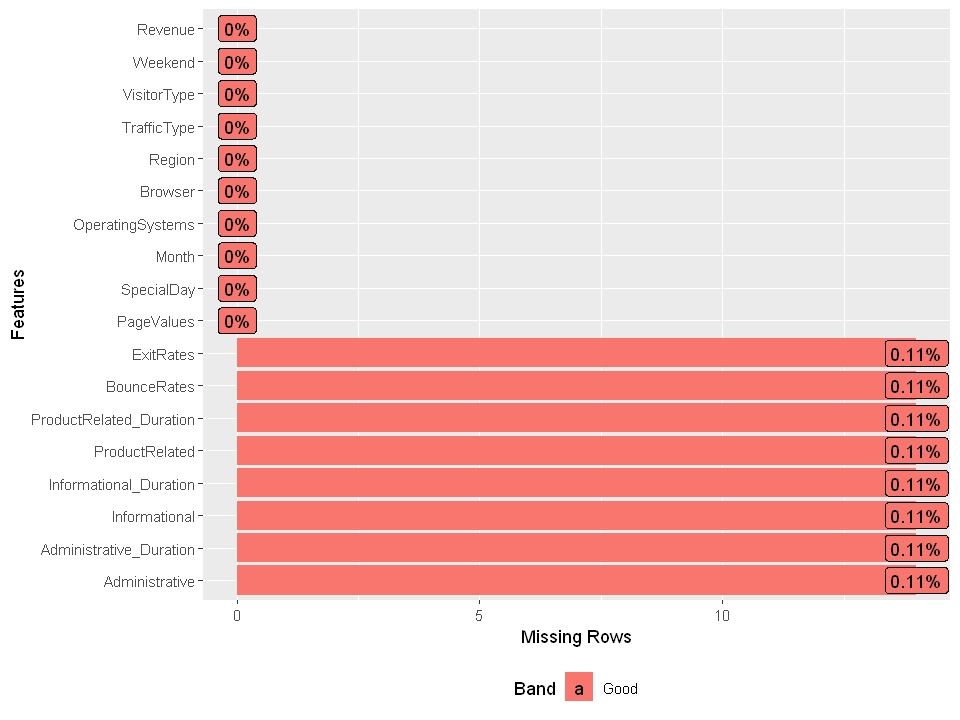

In [13]:
options(repr.plot.width=8, repr.plot.height=6)
# look for missing values using the DataExplorer package
plot_missing(customer)

viewing the dataset size and the missing value plot looks like we 
drop the missing values and stil have  a good dataset to work on but we shall not drop them.


In [15]:
#we convert the categorical datatype

DATA CLEANING

The above dataset has missing values. we shall fill the missing values with their respective means as below

In [16]:
# IMPUTING NULL VALUES
customer = customer %>%
   mutate(Administrative =replace(Administrative,is.na(Administrative),mean(Administrative,na.rm=TRUE)))%>%
   mutate(Administrative_Duration =replace(Administrative_Duration,is.na(Administrative_Duration),mean(Administrative_Duration,na.rm=TRUE)))%>%
   mutate(Informational =replace(Informational,is.na(Informational),mean(Informational,na.rm=TRUE)))%>%
   mutate(Informational_Duration =replace(Informational_Duration,is.na(Informational_Duration),mean(Informational_Duration,na.rm=TRUE)))%>%
   mutate(ProductRelated =replace(ProductRelated,is.na(ProductRelated),mean(ProductRelated,na.rm=TRUE)))%>%
   mutate(ProductRelated_Duration =replace(ProductRelated_Duration,is.na(ProductRelated_Duration),mean(ProductRelated_Duration,na.rm=TRUE)))%>%
   mutate(BounceRates =replace(BounceRates,is.na(BounceRates),mean(BounceRates,na.rm=TRUE)))%>%
   mutate(ExitRates =replace(ExitRates,is.na(ExitRates),mean(ExitRates,na.rm=TRUE)))


In [17]:
#we check whether the missing values were filled successfully.
colSums(is.na(customer))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [18]:
#for our visualization we need to have our features in the correct
#data types so we convert the appropriate features into factors
customer$Region <- as.factor(customer$Region)
customer$VisitorType <- as.factor(customer$VisitorType)
customer$Weekend <- as.factor(customer$Weekend)
customer$OperatingSystems <- as.factor(customer$OperatingSystems)
customer$Informational <- as.factor(customer$Informational)
customer$ProductRelated <- as.factor(customer$ProductRelated)
customer$SpecialDay <- as.factor(customer$SpecialDay)
customer$Administrative <- as.factor(customer$Administrative)


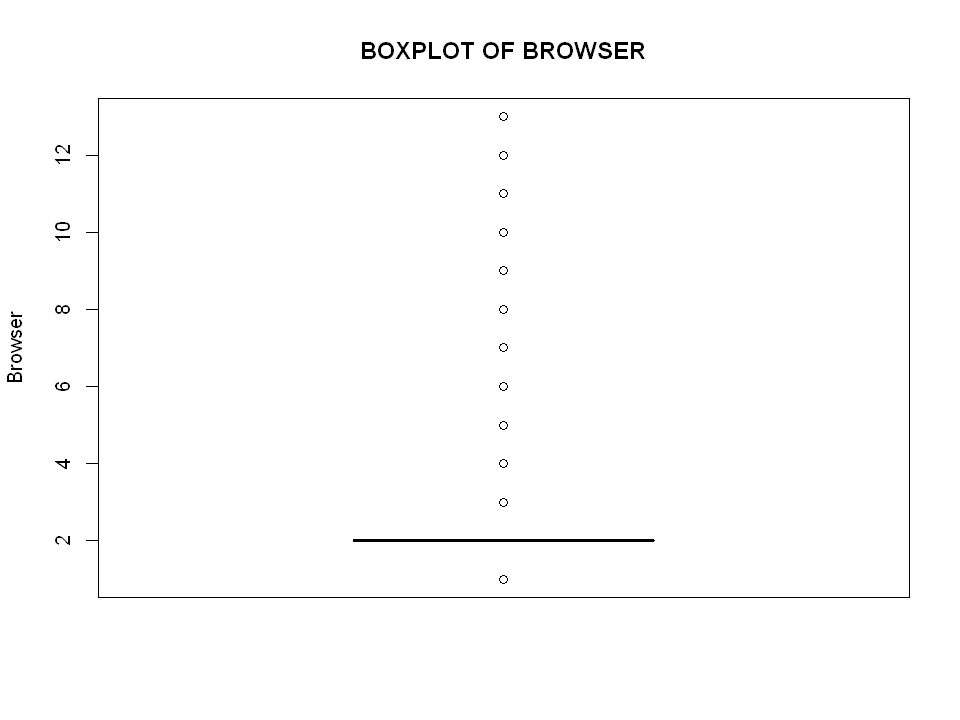

In [20]:
boxplot(customer$Browser,
        main = toupper("Boxplot of Browser"),
        ylab = "Browser",
        col = "maroon")

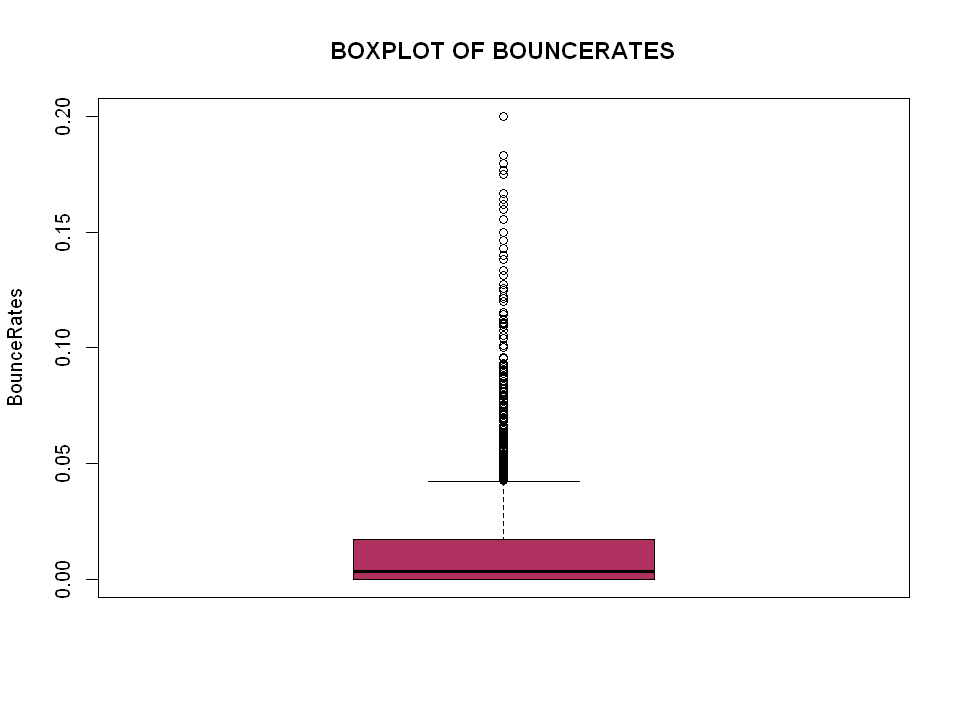

In [21]:
boxplot(customer$BounceRates,
        main = toupper("Boxplot of BounceRates"),
        ylab = "BounceRates",
        col = "maroon")

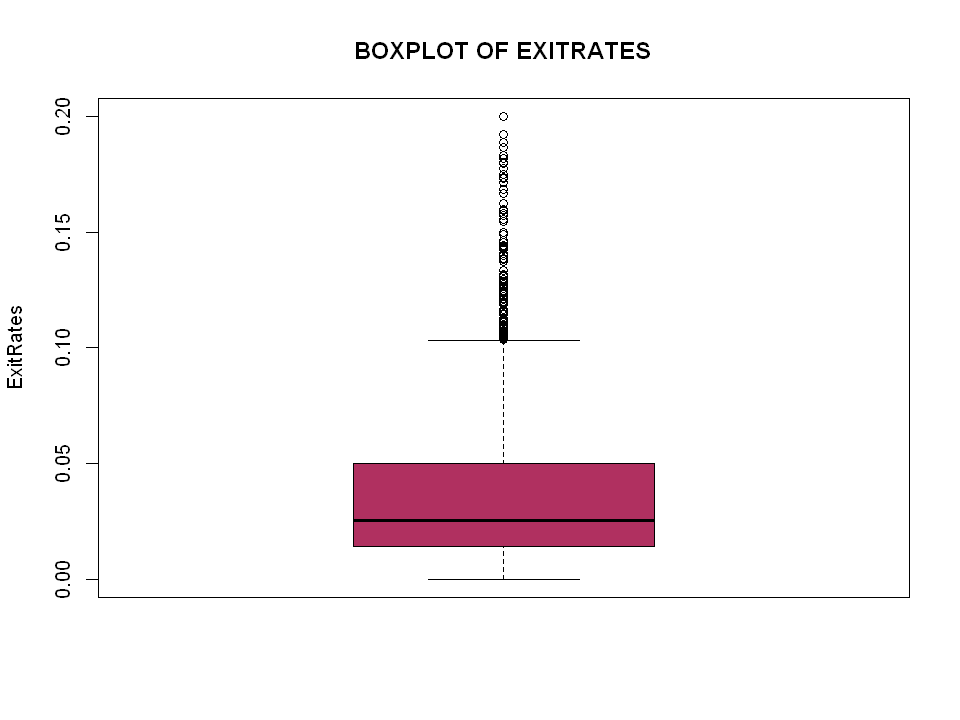

In [22]:
boxplot(customer$ExitRates,
        main = toupper("Boxplot of ExitRates"),
        ylab = "ExitRates",
        col = "maroon")

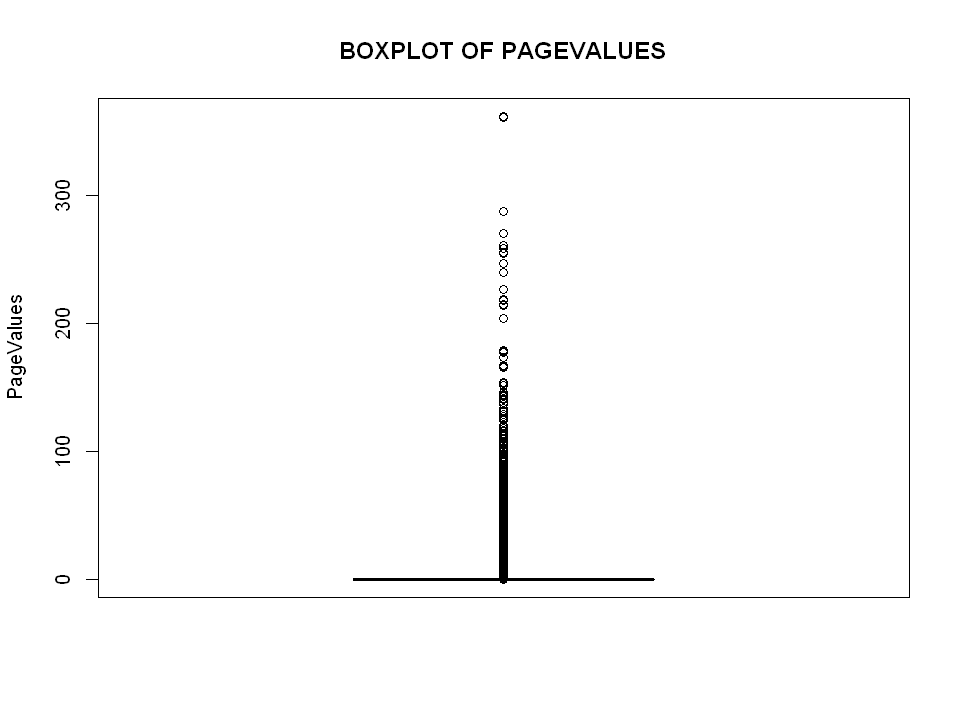

In [24]:
boxplot(customer$PageValues,
        main = toupper("Boxplot of PageValues"),
        ylab = "PageValues",
        col = "maroon")

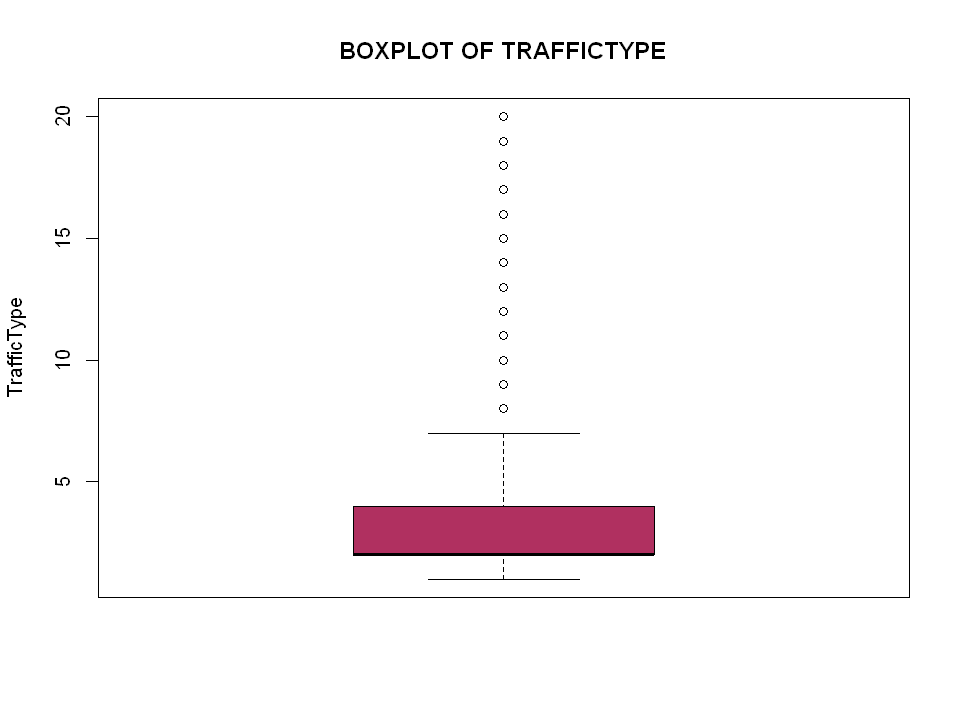

In [25]:
boxplot(customer$TrafficType,
        main = toupper("Boxplot of TrafficType"),
        ylab = "TrafficType",
        col = "maroon")

our dataset has outliers in the columns Traffic type,pagevalues,exitrates, bouncerates, browsers . we shall work with an assumption that all outliers are to be investigated so we shall retain them.
we also hope to use them in our analysis in that we shall visualize our analysis with and without them then we compare

UNIVARIATE ANALYSIS

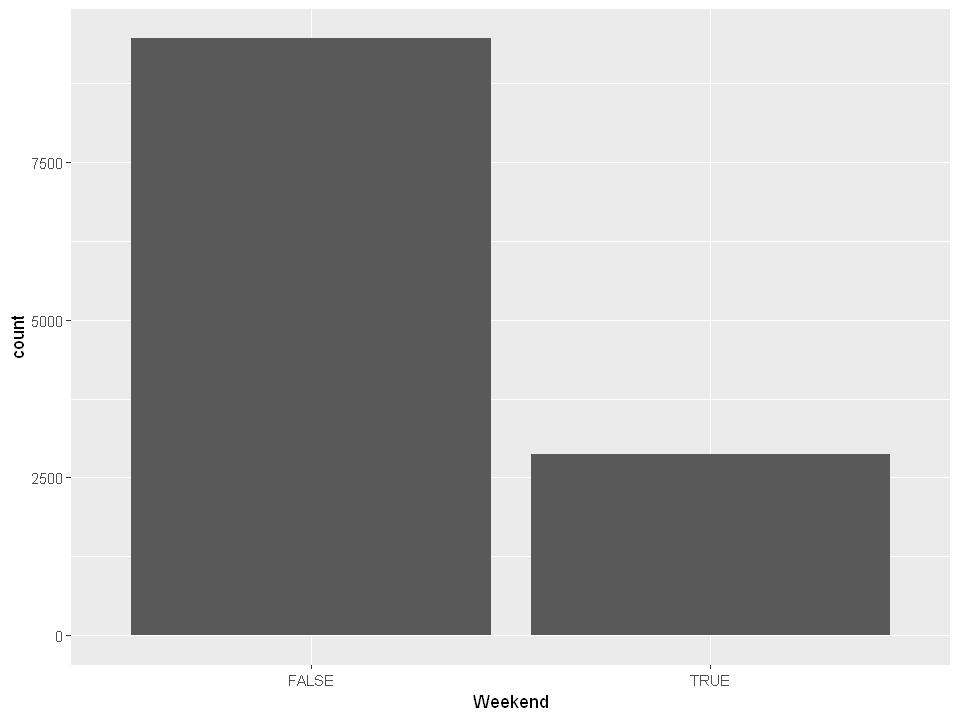

In [59]:
ggplot(data = customer) +
  geom_bar(mapping = aes(x = Weekend))

there were more observations recorded on weekdays than on weekends. this also paintts a pictur of the dataset being imbalanced

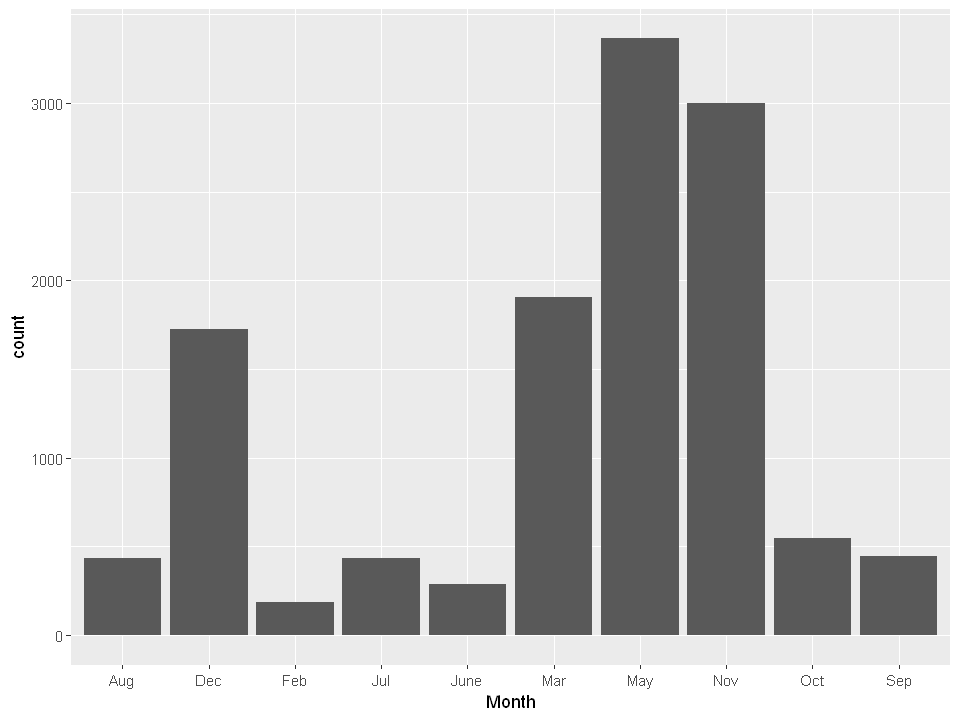

In [60]:
ggplot(data = customer) +
  geom_bar(mapping = aes(x = Month))

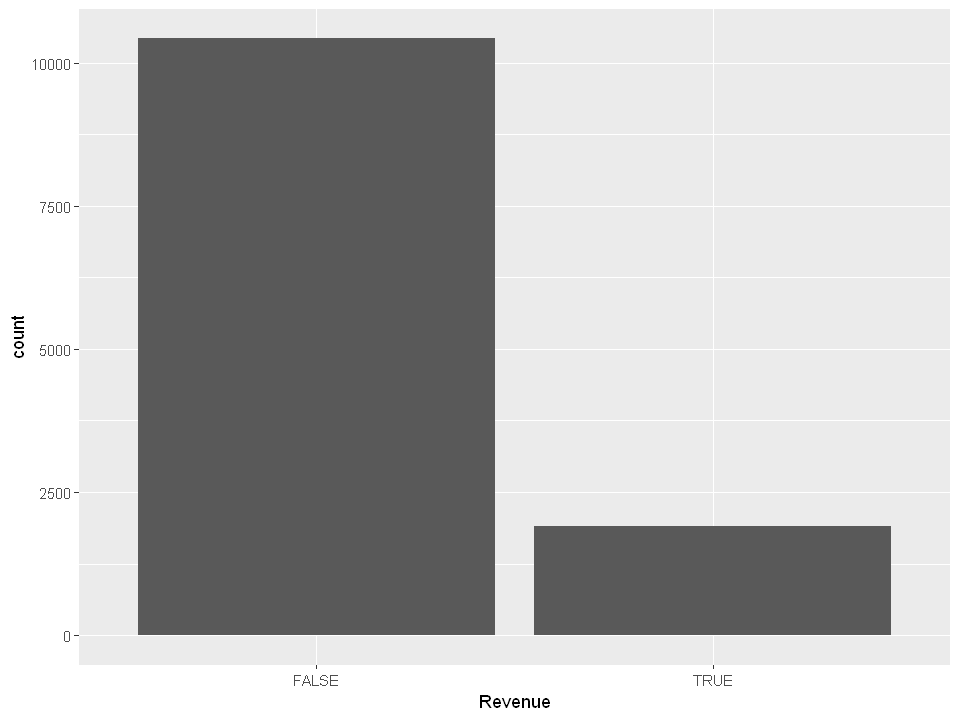

In [61]:
ggplot(data = customer) +
  geom_bar(mapping = aes(x = Revenue))

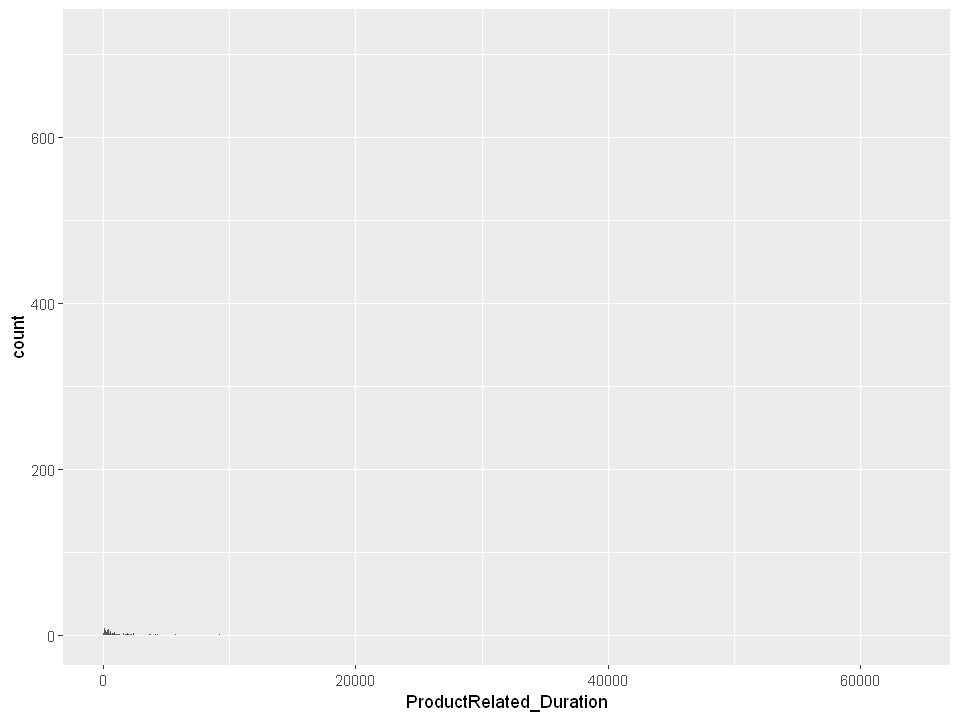

In [65]:
ggplot(data = customer) +
  geom_histogram(mapping = aes(x = ProductRelated_Duration), binwidth = 0.5)

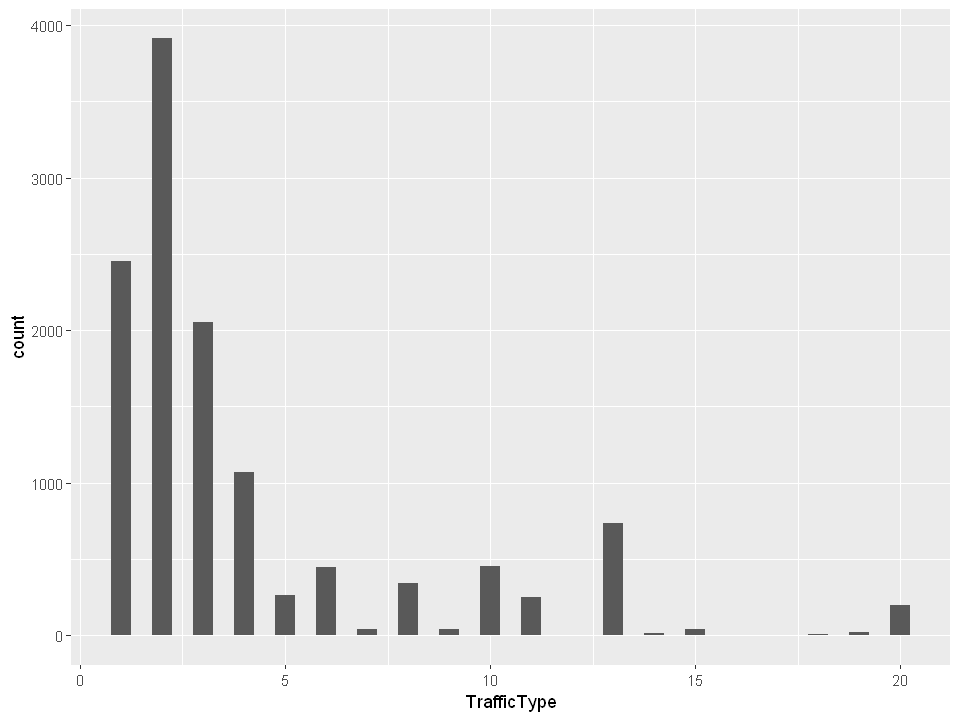

In [63]:
ggplot(data = customer) +
  geom_histogram(mapping = aes(x = TrafficType), binwidth = 0.5)

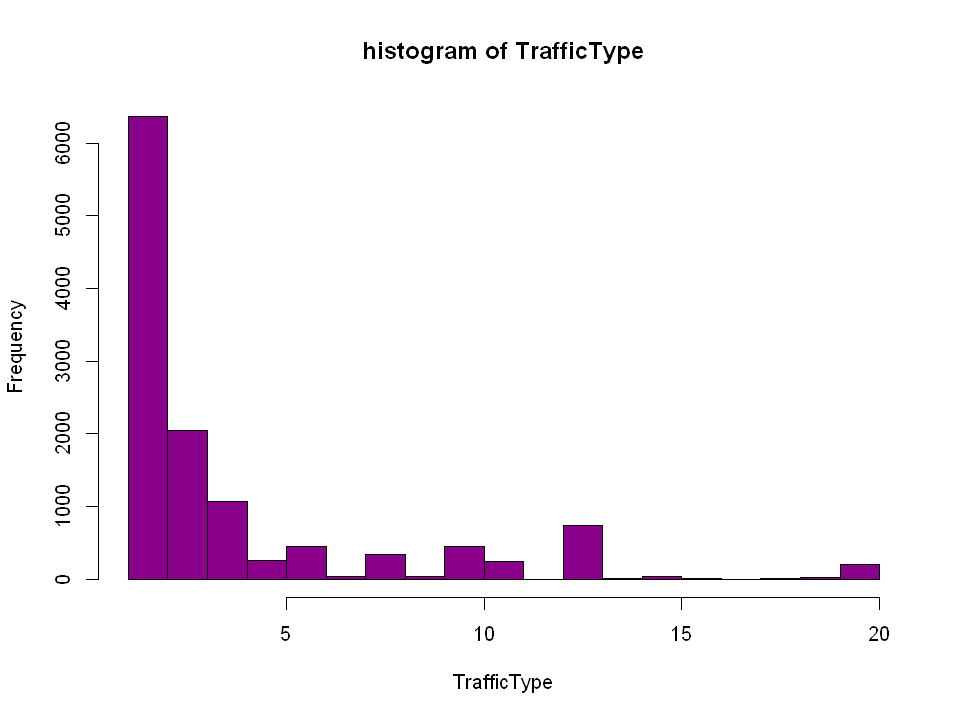

In [27]:
hist(customer$TrafficType,
    main = "histogram of TrafficType",
    xlab = "TrafficType",
    col = "darkmagenta")

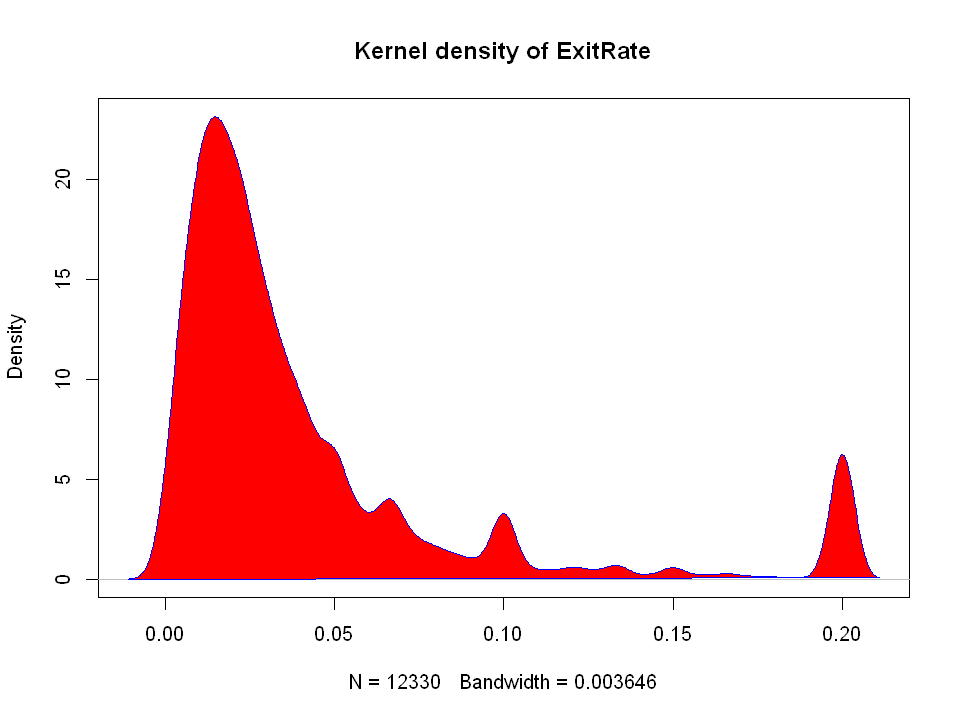

In [32]:
d <- density(customer$ExitRates)
plot(d, main = "Kernel density of ExitRate")
polygon(d, col = "red", border = "blue")

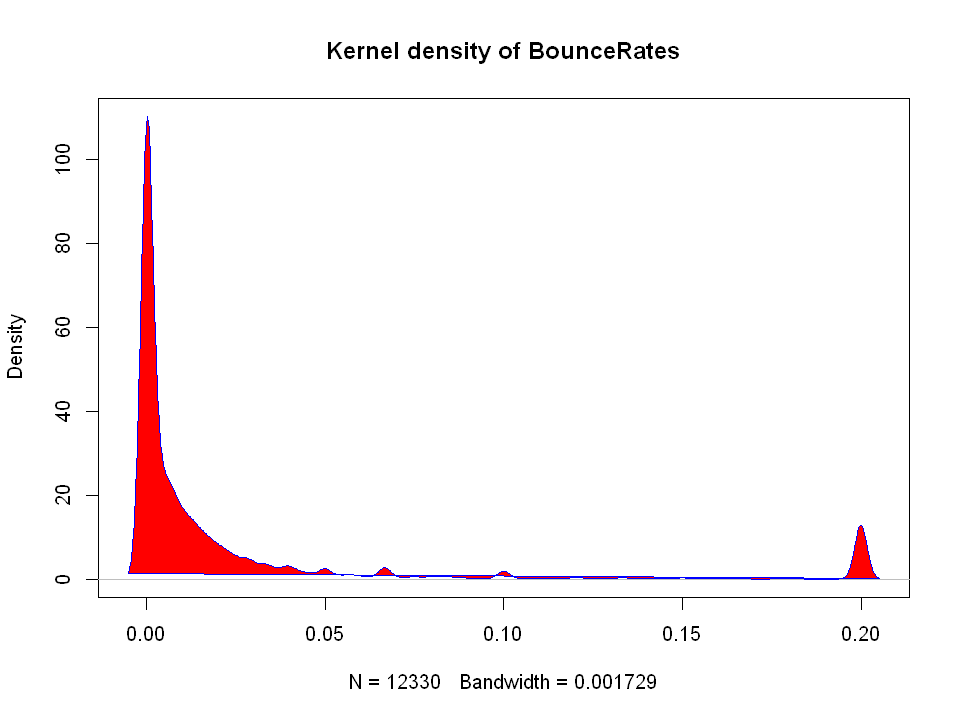

In [31]:
d <- density(customer$BounceRates)
plot(d, main = "Kernel density of BounceRates")
polygon(d, col = "red", border = "blue")

BIVARIATE ANALYSIS

Revenue versus other variables

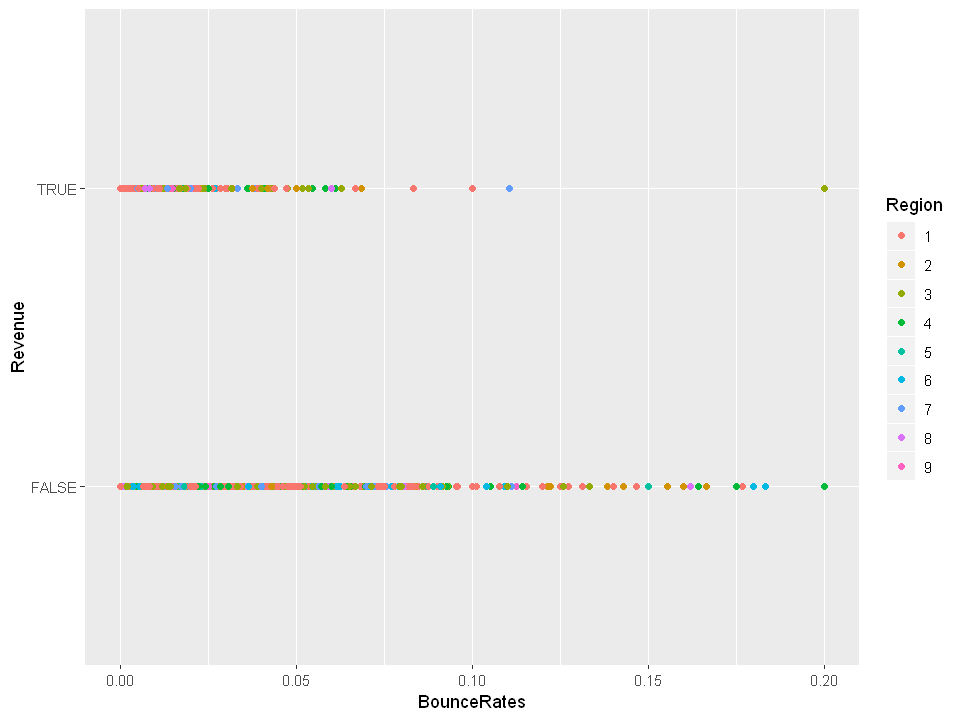

In [42]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = BounceRates, y = Revenue, color = Region))

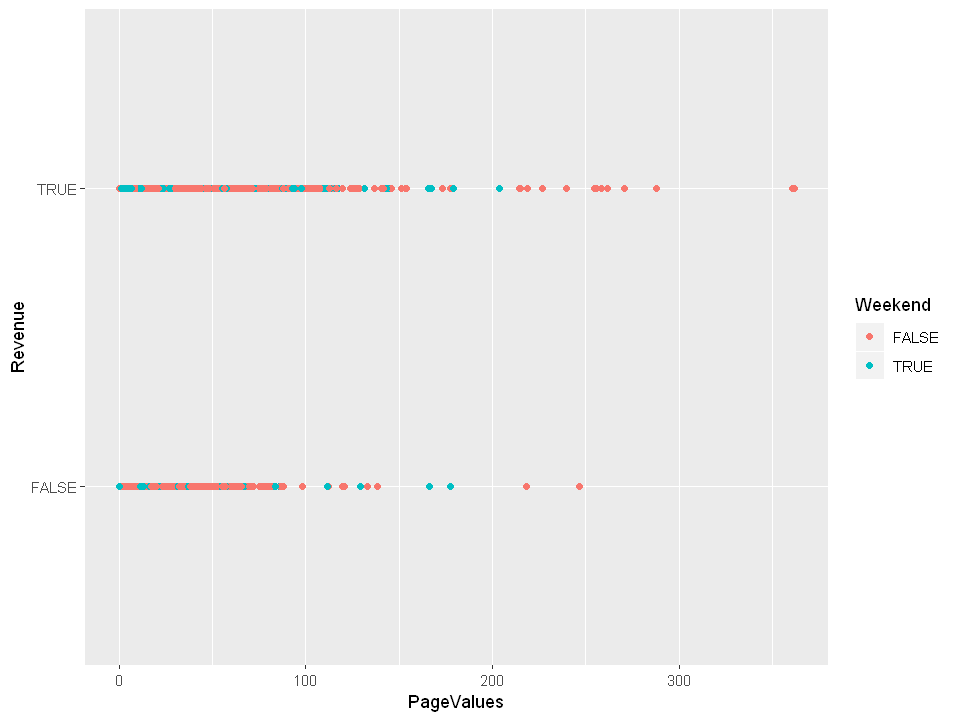

In [44]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = PageValues, y = Revenue, color = Weekend))

Most of the pagevalues translated into revenues. 


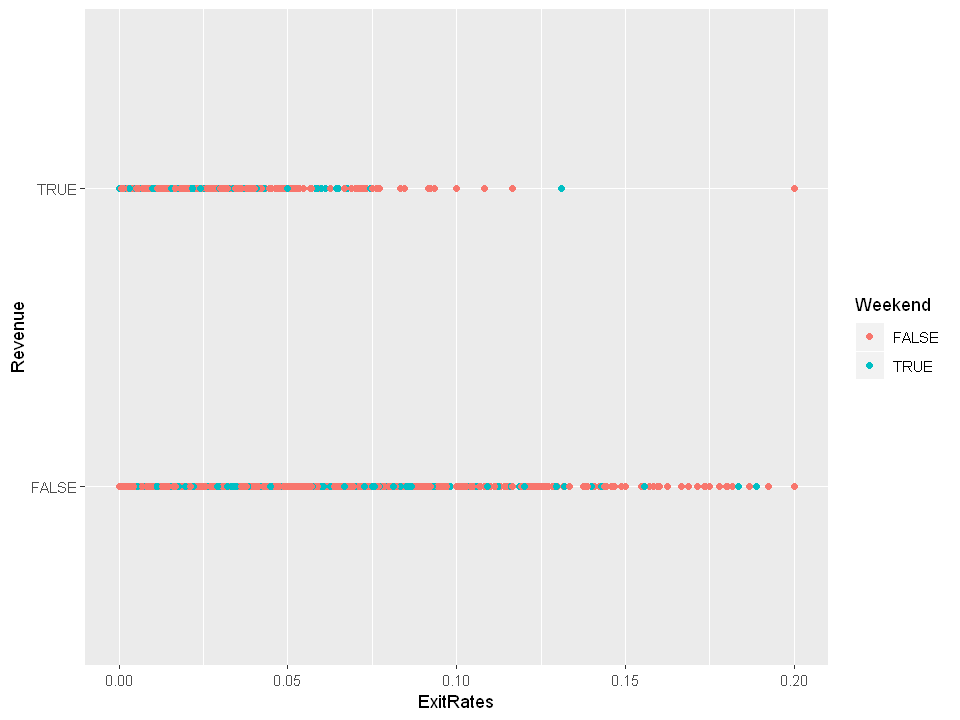

In [48]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = ExitRates, y = Revenue, color = Weekend))

most of the exit rates did not translate to revenues

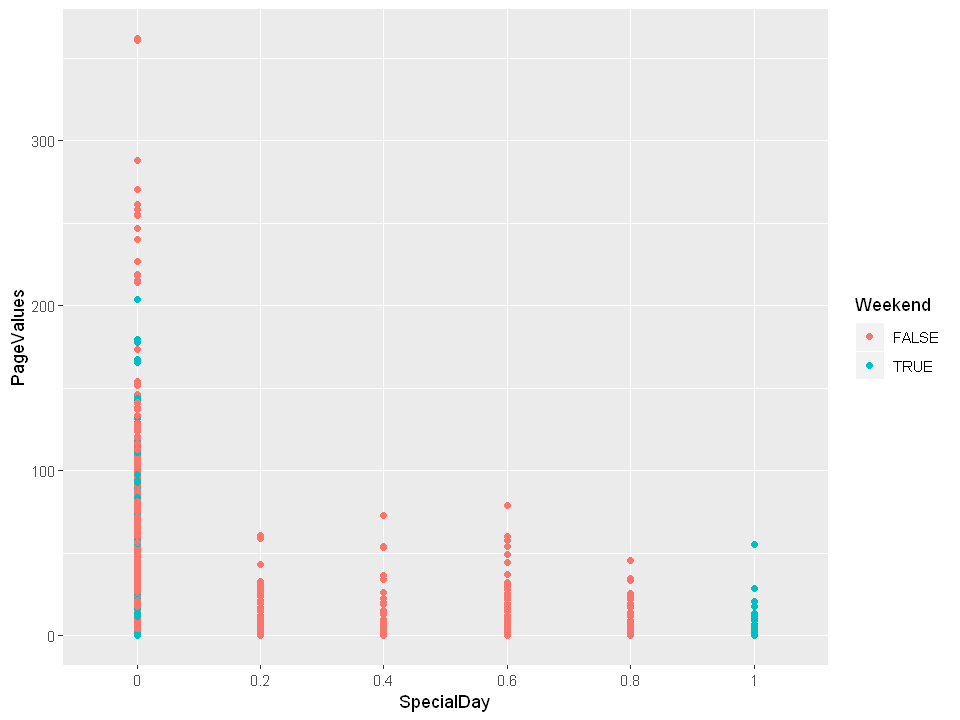

In [49]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = SpecialDay, y = PageValues, color = Weekend))

special days had higher pagevalues on weekdays

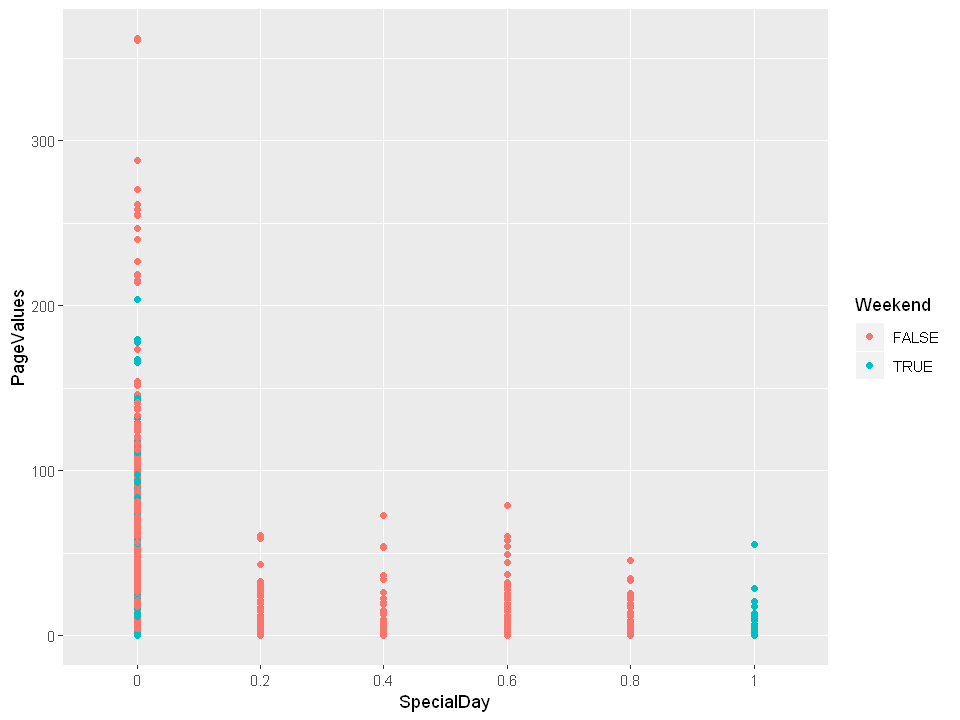

In [58]:
ggplot(data = customer) + 
  geom_point(mapping = aes(x = SpecialDay,y = PageValues, color = Weekend))

special day 0 had the highest page value